In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from scipy.optimize import curve_fit

/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data1 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/00933 - PMT Counts.csv',delimiter=',')
data2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/00934 - PMT Counts.csv',delimiter=',')

In [3]:
timestamps = data1[:,0]
diff1 = data1[:,3]
diff2 = data2[:,3]

parsed1 = diff1[112460:113040]
parsed2 = diff2[5240:5820]
parsed3 = diff2[7360:7940]
parsed4 = diff2[9130:9710]
parsed5 = diff2[10340:10920]
parsed6 = diff2[11290:11870]
parsed7 = diff2[14750:15330]
parsed8 = diff2[15710:16290]
parsed9 = diff2[18020:18600]
average = (np.array(parsed1) + np.array(parsed2) + np.array(parsed3) + np.array(parsed4) + \
                      np.array(parsed5) + np.array(parsed6) + np.array(parsed7) + np.array(parsed8) + np.array(parsed9))/9.0

<IPython.core.display.Javascript object>


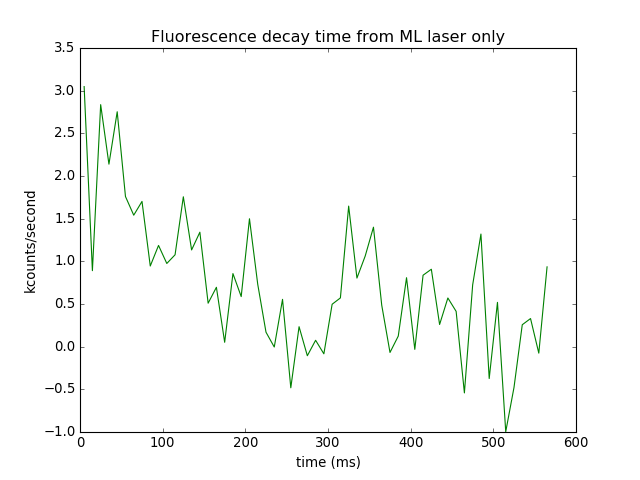

In [9]:
times = np.linspace(0, 579, 580)
np.savetxt('/home/qsimexpcontrol/plots/ML_Laser/average.csv', average)
plt.title('Fluorescence decay time from ML laser only')
plt.xlabel('time (ms)')
plt.ylabel('kcounts/second')
coursedx, coursedy = coursen(np.array(times),np.array(average), 10)
plt.plot(coursedx, coursedy, 'g')

In [5]:
def coursen(xdata,ydata,points):
    newlength = int(len(xdata)/points)
    newxdata = []
    newydata = []
    j = 0
    for i in range(newlength):
        i = points*(i)
        newydata.append(np.mean(ydata[int(j):int(i)]))
        newxdata.append(xdata[int((i + j)/2)])
        j = i
    return newxdata, newydata

In [7]:
data68 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/ML Piezo Scan.dir/00068 - ML Piezo Scan.csv',delimiter=',')
data69 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/ML Piezo Scan.dir/00069 - ML Piezo Scan.csv',delimiter=',')
data70 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/ML Piezo Scan.dir/00070 - ML Piezo Scan.csv',delimiter=',')
data71 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/ML Piezo Scan.dir/00071 - ML Piezo Scan.csv',delimiter=',')

<IPython.core.display.Javascript object>


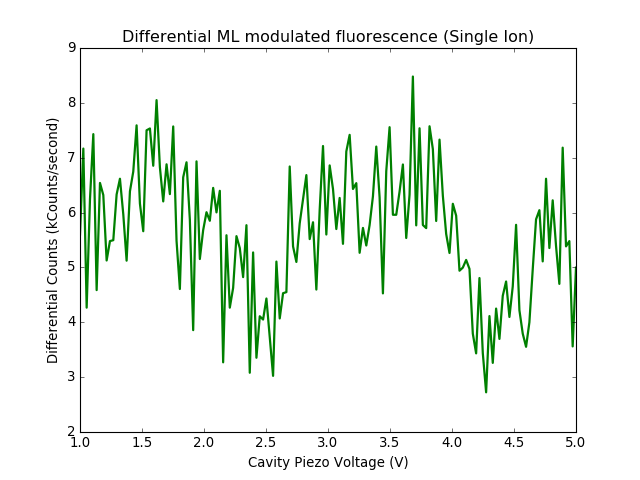

In [10]:
voltages = data68[:,0]
mean = (data68[:,1] + data69[:,1] + data70[:,1])/3.0
plt.title('Differential ML modulated fluorescence (Single Ion)')
plt.xlabel('Cavity Piezo Voltage (V)')
plt.ylabel('Differential Counts (kCounts/second)')
plt.plot(voltages, mean, 'g', linewidth=2)
#plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/modulated_flourescence.pdf')